In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig

**Data Extraction**

In [ ]:
"""
The Iris dataset has the following features which are used to predict the species of each iris instance
"""
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [ ]:
"""
Reading the csv file
Specifying header will be used for column names(header=none)
Skipping the first row which is column names for future calculations on the data(skiprows)
"""
df = pd.read_csv('iris_data.csv', header=None, names=columns, skiprows=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
df.shape

(149, 5)

In [ ]:
"""
Extracting the features used as input for training 
"""
df_features = df.drop('class', axis = 1)
df_features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


**Standardize the data using mean and standart deviation of the data**

In [ ]:
"""
Calculating mean for each dimension in the dataset
"""
df_hat = df_features.mean(axis = 0)
df_hat

sepal_length    5.848322
sepal_width     3.051007
petal_length    3.774497
petal_width     1.205369
dtype: float64

In [ ]:
"""
Calculating standard deviation for each dimension
"""
sigma = np.std(df_features, axis = 0, ddof = 1)
sigma

sepal_length    0.828594
sepal_width     0.433499
petal_length    1.759651
petal_width     0.761292
dtype: float64

In [ ]:
"""
The standardized features of the data using the mean and standard deviation
"""
X_std = (df_features - df_hat) / sigma
X_std

,sepal_length,sepal_width,petal_length,petal_width
0,-1.144495,-0.117663,-1.349413,-1.320609
1,-1.385868,0.343699,-1.406243,-1.320609
2,-1.506555,0.113018,-1.292584,-1.320609
3,-1.023809,1.266424,-1.349413,-1.320609
4,-0.541064,1.958467,-1.178925,-1.057898
...,...,...,...,...
144,1.027859,-0.117663,0.810106,1.437859
145,0.545114,-1.271068,0.696447,0.912437
146,0.786486,-0.117663,0.810106,1.043792
147,0.424427,0.805062,0.923765,1.437859


**DIMENSIONALITY REDUCTION USING PRINCIPAL COMPONENT ANALYSIS**

**1. CALCULATING THE COVARIANCE MATRIX**

In [ ]:
"""
Calculating covariance using numpy library
covariance is calculated between each pair of dimensions
"""
covariance = np.cov(X_std, rowvar = False)
covariance

array([[ 1.        , -0.10378415,  0.87128294,  0.81697087],
       [-0.10378415,  1.        , -0.41521773, -0.35073314],
       [ 0.87128294, -0.41521773,  1.        ,  0.9623143 ],
       [ 0.81697087, -0.35073314,  0.9623143 ,  1.        ]])

**2. EIGEN DECOMPOSITION**

**EIGENVALUES AND EIGENVECTORS**

In [ ]:
"""
Calculating eigenvalues and eigenvectors for the covariance matrix above
"""
eigen_values, eigen_vectors = eig(covariance)

In [ ]:
print("Eigenvalues: ", eigen_values)
print("Eigenvectors: ", eigen_vectors)

Eigenvalues:  [2.90480133 0.92589627 0.14846062 0.02084177]
Eigenvectors:  [[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]


**CALCULATING THE IMPORTANCE OF EACH FEATURE**

In [ ]:
"""
Calculating the percentage of how each featuer is relevant to the taregt variable
"""
print("Feature 1:",100*eigen_values[0]/sum(eigen_values))
print("Feature 2:",100*eigen_values[1]/sum(eigen_values))
print("Feature 3:",100*eigen_values[2]/sum(eigen_values))
print("Feature 4:",100*eigen_values[3]/sum(eigen_values))

Feature 1: 72.62003332692032
Feature 2: 23.14740685864411
Feature 3: 3.711515564584542
Feature 4: 0.5210442498510274


Text(0.5, 0, 'Dimensions')

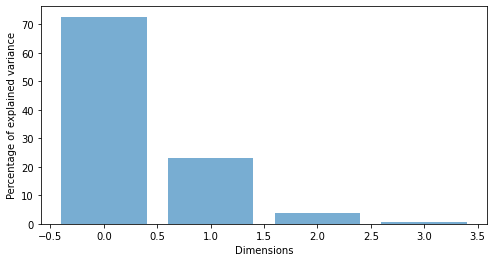

In [ ]:
"""
The importance of each feature can also be plotted
"""
explained_variance=(eigen_values / np.sum(eigen_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [ ]:
"""
Sorting the dimensions according to the eigenvalues
Sorting the eigenvector according sorted dimensions
"""
sorted_index = np.argsort(eigen_values)[::-1]

sorted_eigenvectors = eigen_vectors[:, sorted_index]
print("Important dimensions in decreasing order:", sorted_index)
print("Eigenvector sorted according to the important features: ", sorted_eigenvectors)


Important dimensions in decreasing order: [0 1 2 3]
Eigenvector sorted according to the important features:  [[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]


**3. SET DIMENSION AND CONSIDER IMPORTANT DIMESIONS**

In [ ]:
"""
Reducing the eigenvector to two dimesions where these two features are the most relevant ones with the target
"""
n_components = 2
reduced_eigenvectors = sorted_eigenvectors[:, 0:n_components]

In [ ]:
"""
The eigenvector after dimensionality reduction
"""
reduced_eigenvectors

array([[ 0.52308496, -0.36956962],
       [-0.25956935, -0.92681168],
       [ 0.58184289, -0.01912775],
       [ 0.56609604, -0.06381646]])

**4. REDUCE THE DIMESION OF THE STANDARDIZED DATASET**

In [ ]:
"""
The PCA for the data is calculated as the multiplication between the eigenvector and the standadized data
"""
transformed = np.matmul(X_std, reduced_eigenvectors)

transformed

,0,1
0,-2.100865,0.642110
1,-2.379944,0.304805
2,-2.317064,0.561031
3,-2.397002,-0.685280
4,-2.076201,-1.525108
...,...,...
144,1.853520,-0.378069
145,1.536821,0.905034
146,1.504182,-0.263717
147,1.364494,-1.012424


**CONSTRUCT A DATAFRAME USING THE REDUCED DIMESION AND THE LABEL**

In [ ]:
"""
Taking the two dimensions as features and concatinating them with label of the observations
"""
X = transformed.iloc[:, 0]
Y = transformed.iloc[:, 1]
transformed.columns = ['PCA1', 'PCA2']
final_df = pd.concat([transformed, df['class']], axis = 1)
final_df

,PCA1,PCA2,class
0,-2.100865,0.642110,Iris-setosa
1,-2.379944,0.304805,Iris-setosa
2,-2.317064,0.561031,Iris-setosa
3,-2.397002,-0.685280,Iris-setosa
4,-2.076201,-1.525108,Iris-setosa
...,...,...,...
144,1.853520,-0.378069,Iris-virginica
145,1.536821,0.905034,Iris-virginica
146,1.504182,-0.263717,Iris-virginica
147,1.364494,-1.012424,Iris-virginica


**GETTING THE ORIGINAL STANDARDIZED DATA AFTER DIMENSIONALITY REDUCTION**

In [ ]:
"""
Computing the original standardized data as the product of eigenvector transpose and the transformed data
"""
reduced_eigenvectors = np.transpose(reduced_eigenvectors)
reverted = np.matmul(transformed, reduced_eigenvectors)
reverted.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
reverted

,sepal_length,sepal_width,petal_length,petal_width
0,-1.336235,-0.049795,-1.234655,-1.230268
1,-1.357560,0.335264,-1.390584,-1.366729
2,-1.419362,0.081469,-1.358899,-1.347484
3,-1.000577,1.257314,-1.381571,-1.313201
4,-0.522396,1.952406,-1.178851,-1.078002
...,...,...,...,...
144,1.109271,-0.130718,1.085689,1.073397
145,0.469415,-1.237707,0.876877,0.812232
146,0.884277,-0.146024,0.880242,0.868341
147,1.087908,0.584146,0.813287,0.837044


**PLOTTING THE REDUCED DATAFRAME**

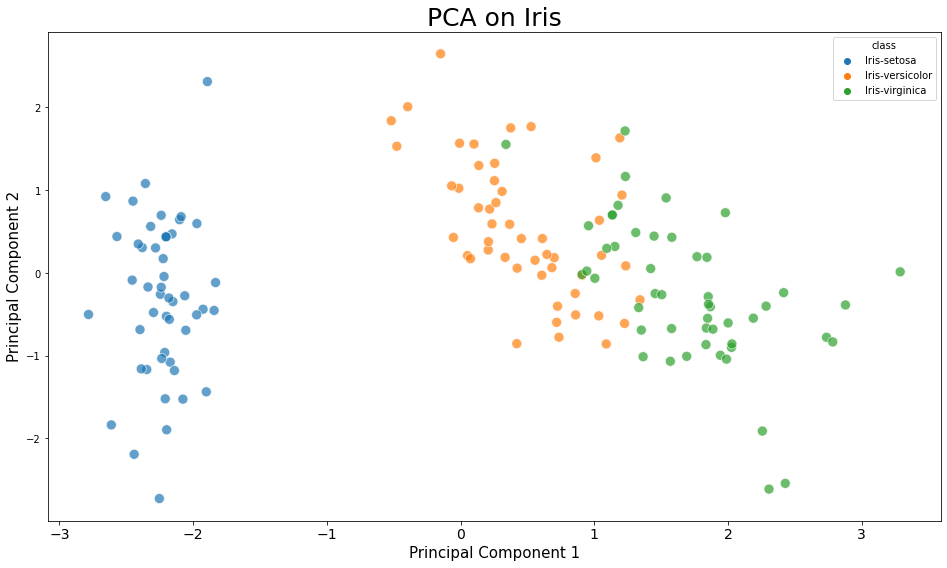

In [ ]:
import seaborn as sns
label = [1, 2, 3, 4]
plt.figure(figsize = (16, 9))
sns.scatterplot(x = X, y = Y, data = final_df, hue = "class", alpha = 0.7,
               s = 100);

plt.title('PCA on Iris', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

**CALCULATING THE DEVIATION OF THE REDUCED DIMENSION FROM THE ACTUAL OBSERVATION**

In [ ]:
def Euclidean_Dist(df1, df2, cols=['sepal_length','sepal_width', 'petal_length', 'petal_width']):
    return np.linalg.norm(df1[cols].values - df2[cols].values,
                   axis=1)

In [ ]:
dis = Euclidean_Dist(X_std, reverted)
print(np.mean(dis))

0.34387998915152146


In [ ]:
from numpy import linalg as LA
total_loss=LA.norm((X_std-reverted),None)
total_loss

5.005672192768755

**PCA USING SCIKITLEARN**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_std)
X_train

array([[-2.10086475, -0.6421099 ],
       [-2.37994449, -0.30480506],
       [-2.31706435, -0.56103097],
       [-2.397002  ,  0.68527976],
       [-2.07620112,  1.525108  ],
       [-2.45540349,  0.08765848],
       [-2.2441807 ,  0.2587709 ],
       [-2.35663311, -1.0789179 ],
       [-2.20203659, -0.43560759],
       [-2.17129706,  1.07857277],
       [-2.33737333,  0.17065389],
       [-2.23835388, -0.69509456],
       [-2.6531974 , -0.92136568],
       [-2.19761084,  1.89511359],
       [-2.25233381,  2.7257297 ],
       [-2.20846436,  1.52075992],
       [-2.19963513,  0.52446648],
       [-1.90129562,  1.43673344],
       [-2.34620256,  1.16694733],
       [-1.92553221,  0.43935299],
       [-2.21196491,  0.96153204],
       [-2.78178212,  0.50252363],
       [-1.83196241,  0.11689696],
       [-2.23817591,  0.17391495],
       [-1.97160391, -0.59533385],
       [-2.06239509,  0.27662322],
       [-2.17780001,  0.56177286],
       [-2.15098807,  0.3468879 ],
       [-2.28074706,

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_std)
X_train

array([[-2.10086475, -0.6421099 ],
       [-2.37994449, -0.30480506],
       [-2.31706435, -0.56103097],
       [-2.397002  ,  0.68527976],
       [-2.07620112,  1.525108  ],
       [-2.45540349,  0.08765848],
       [-2.2441807 ,  0.2587709 ],
       [-2.35663311, -1.0789179 ],
       [-2.20203659, -0.43560759],
       [-2.17129706,  1.07857277],
       [-2.33737333,  0.17065389],
       [-2.23835388, -0.69509456],
       [-2.6531974 , -0.92136568],
       [-2.19761084,  1.89511359],
       [-2.25233381,  2.7257297 ],
       [-2.20846436,  1.52075992],
       [-2.19963513,  0.52446648],
       [-1.90129562,  1.43673344],
       [-2.34620256,  1.16694733],
       [-1.92553221,  0.43935299],
       [-2.21196491,  0.96153204],
       [-2.78178212,  0.50252363],
       [-1.83196241,  0.11689696],
       [-2.23817591,  0.17391495],
       [-1.97160391, -0.59533385],
       [-2.06239509,  0.27662322],
       [-2.17780001,  0.56177286],
       [-2.15098807,  0.3468879 ],
       [-2.28074706,

**DIMENSIONALITY REDUCTION USING SINGULAR VALUED DECOMPOSITION**

**1. CALCULATING THE SINGULAR VALUED DECOMPOSTION VECTORS FOR THE DATA**

In [ ]:
from numpy.linalg import svd
"""
Computing the SVD for the dataset using the builtin numpy svd calculator
"""
U, sig, VT = svd(X_std, full_matrices = False)


In [ ]:
print("Size of U is: ", U.shape)
print(U)

Size of U is:  (149, 4)
[[-0.10132323 -0.05485262 -0.04864041  0.05894447]
 [-0.11478305 -0.02603815  0.0105611   0.01604434]
 [-0.11175038 -0.0479264   0.0206543  -0.03752975]
 [-0.11560572  0.05854043  0.00400117 -0.0209972 ]
 [-0.10013372  0.13028325  0.00590158  0.00279828]
 [-0.11842238  0.00748828  0.07233185 -0.02148679]
 [-0.10823526  0.02210566 -0.01804564 -0.01424381]
 [-0.11365876 -0.0921672   0.03237652 -0.01508652]
 [-0.10620268 -0.03721203 -0.05283868 -0.02244185]
 [-0.10472013  0.09213771 -0.05674558  0.00904214]
 [-0.11272987  0.01457821  0.0208019  -0.07630882]
 [-0.10795423 -0.05937886 -0.04782398  0.00173891]
 [-0.12796184 -0.0787082   0.03998427 -0.01087306]
 [-0.10598922  0.16189119 -0.10052402  0.11008295]
 [-0.10862847  0.23284706  0.00613296  0.02717576]
 [-0.10651268  0.12991181 -0.00086976  0.10647142]
 [-0.10608685  0.04480286 -0.00868508  0.0525442 ]
 [-0.09169815  0.1227338  -0.07946122  0.03422202]
 [-0.1131557   0.09968716  0.02861722 -0.0223816 ]
 [-0.09

In [ ]:
print("Size of sigma is: ", np.diag(sig).shape)
print(np.diag(sig))

Size of sigma is:  (4, 4)
[[20.73428555  0.          0.          0.        ]
 [ 0.         11.70609451  0.          0.        ]
 [ 0.          0.          4.68744836  0.        ]
 [ 0.          0.          0.          1.7562978 ]]


In [ ]:
print("Size of V transpose is: ", VT.shape)
print(VT)

Size of V transpose is:  (4, 4)
[[ 0.52308496 -0.25956935  0.58184289  0.56609604]
 [ 0.36956962  0.92681168  0.01912775  0.06381646]
 [-0.72154279  0.2411952   0.13962963  0.63380158]
 [ 0.26301409 -0.12437342 -0.80099722  0.52321917]]


In [ ]:
"""
Verification of the SVD
"""
df_SVD = U@np.diag(sigma)@VT
df_SVD

array([[-1.14449547, -0.11766285, -1.34941328, -1.32060901],
       [-1.38586819,  0.34369936, -1.40624272, -1.32060901],
       [-1.50655455,  0.11301826, -1.29258383, -1.32060901],
       [-1.02380911,  1.26642378, -1.34941328, -1.32060901],
       [-0.54106368,  1.9584671 , -1.17892494, -1.05789774],
       [-1.50655455,  0.80506157, -1.34941328, -1.18925337],
       [-1.02380911,  0.80506157, -1.29258383, -1.32060901],
       [-1.74792727, -0.34834395, -1.34941328, -1.32060901],
       [-1.14449547,  0.11301826, -1.29258383, -1.45196464],
       [-0.54106368,  1.49710489, -1.29258383, -1.32060901],
       [-1.26518183,  0.80506157, -1.23575439, -1.32060901],
       [-1.26518183, -0.11766285, -1.34941328, -1.45196464],
       [-1.86861363, -0.11766285, -1.51990162, -1.45196464],
       [-0.05831824,  2.1891482 , -1.46307217, -1.32060901],
       [-0.1790046 ,  3.11187262, -1.29258383, -1.05789774],
       [-0.54106368,  1.9584671 , -1.40624272, -1.05789774],
       [-0.90312275,  1.

**2.PERFORMING DIMENSIONALITY REDUCTION**

In [ ]:
"""
Reduce the U vector since the two features are important
This is deduced from the diagonal elemments of the sigma vector
The first and second element show more importance
"""
n_comp = 2
reduced_U = U[:, :2]
reduced_U

array([[-0.10132323, -0.05485262],
       [-0.11478305, -0.02603815],
       [-0.11175038, -0.0479264 ],
       [-0.11560572,  0.05854043],
       [-0.10013372,  0.13028325],
       [-0.11842238,  0.00748828],
       [-0.10823526,  0.02210566],
       [-0.11365876, -0.0921672 ],
       [-0.10620268, -0.03721203],
       [-0.10472013,  0.09213771],
       [-0.11272987,  0.01457821],
       [-0.10795423, -0.05937886],
       [-0.12796184, -0.0787082 ],
       [-0.10598922,  0.16189119],
       [-0.10862847,  0.23284706],
       [-0.10651268,  0.12991181],
       [-0.10608685,  0.04480286],
       [-0.09169815,  0.1227338 ],
       [-0.1131557 ,  0.09968716],
       [-0.09286706,  0.03753199],
       [-0.10668151,  0.08213944],
       [-0.13416339,  0.04292838],
       [-0.08835426,  0.00998599],
       [-0.10794565,  0.01485679],
       [-0.09508907, -0.05085674],
       [-0.09946786,  0.0236307 ],
       [-0.10503376,  0.04798978],
       [-0.10374064,  0.0296331 ],
       [-0.10999883,

In [ ]:
reduced_VT = VT[:2]

reduced_VT

array([[ 0.52308496, -0.25956935,  0.58184289,  0.56609604],
       [ 0.36956962,  0.92681168,  0.01912775,  0.06381646]])

**REDUCING THE DIMENSION USING SVD**

In [ ]:
"""
The reduced dimension is calculated as the product of the reduced U vector and reduced sigma vectors
"""
reduced_df = reduced_U@np.diag(sigma[:2])
reduced_df


array([[-2.10086475, -0.6421099 ],
       [-2.37994449, -0.30480506],
       [-2.31706435, -0.56103097],
       [-2.397002  ,  0.68527976],
       [-2.07620112,  1.525108  ],
       [-2.45540349,  0.08765848],
       [-2.2441807 ,  0.2587709 ],
       [-2.35663311, -1.0789179 ],
       [-2.20203659, -0.43560759],
       [-2.17129706,  1.07857277],
       [-2.33737333,  0.17065389],
       [-2.23835388, -0.69509456],
       [-2.6531974 , -0.92136568],
       [-2.19761084,  1.89511359],
       [-2.25233381,  2.7257297 ],
       [-2.20846436,  1.52075992],
       [-2.19963513,  0.52446648],
       [-1.90129562,  1.43673344],
       [-2.34620256,  1.16694733],
       [-1.92553221,  0.43935299],
       [-2.21196491,  0.96153204],
       [-2.78178212,  0.50252363],
       [-1.83196241,  0.11689696],
       [-2.23817591,  0.17391495],
       [-1.97160391, -0.59533385],
       [-2.06239509,  0.27662322],
       [-2.17780001,  0.56177286],
       [-2.15098807,  0.3468879 ],
       [-2.28074706,

**Constructing dataframe from the reduced dimension**

In [ ]:
F_reduced_df = pd.DataFrame(reduced_df, columns = ["PCA_SVD1", "PCA_SVD2"])

final_reduced_df = pd.concat([F_reduced_df, df['class']], axis = 1)
final_reduced_df

,PCA_SVD1,PCA_SVD2,class
0,-2.100865,-0.642110,Iris-setosa
1,-2.379944,-0.304805,Iris-setosa
2,-2.317064,-0.561031,Iris-setosa
3,-2.397002,0.685280,Iris-setosa
4,-2.076201,1.525108,Iris-setosa
...,...,...,...
144,1.853520,0.378069,Iris-virginica
145,1.536821,-0.905034,Iris-virginica
146,1.504182,0.263717,Iris-virginica
147,1.364494,1.012424,Iris-virginica


**REVERTING BACK TO THE ORIGINAL DATA**

In [ ]:
original_df = reduced_df@reduced_VT

original_df = pd.DataFrame(original_df, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
original_df

,sepal_length,sepal_width,petal_length,petal_width
0,-1.336235,-0.049795,-1.234655,-1.230268
1,-1.357560,0.335264,-1.390584,-1.366729
2,-1.419362,0.081469,-1.358899,-1.347484
3,-1.000577,1.257314,-1.381571,-1.313201
4,-0.522396,1.952406,-1.178851,-1.078002
...,...,...,...,...
144,1.109271,-0.130718,1.085689,1.073397
145,0.469415,-1.237707,0.876877,0.812232
146,0.884277,-0.146024,0.880242,0.868341
147,1.087908,0.584146,0.813287,0.837044


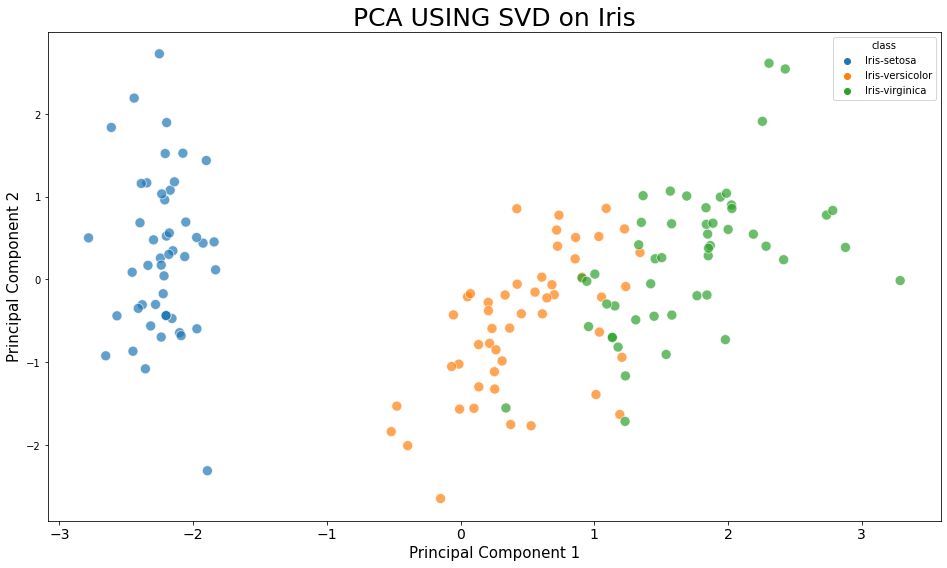

In [80]:
import seaborn as sns

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PCA_SVD1", y = "PCA_SVD2", data = final_reduced_df, hue = "class", alpha = 0.7,
               s = 100);

plt.title('PCA USING SVD on Iris', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert_SVD.jpg")

**CALCULATING THE DEVIATION OF THE REDUCED DIMENSION FROM THE ACTUAL OBSERVATION**

In [ ]:
from numpy import linalg as LA
total_loss=LA.norm((X_std-original_df),None)
total_loss

5.005672192768756

**DIMENSIONALITY REDUCTION USING SVD WITH SCIKIT LEARN**

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_std)
X_svd

array([[-2.10086475, -0.6421099 ],
       [-2.37994449, -0.30480506],
       [-2.31706435, -0.56103097],
       [-2.397002  ,  0.68527976],
       [-2.07620112,  1.525108  ],
       [-2.45540349,  0.08765848],
       [-2.2441807 ,  0.2587709 ],
       [-2.35663311, -1.0789179 ],
       [-2.20203659, -0.43560759],
       [-2.17129706,  1.07857277],
       [-2.33737333,  0.17065389],
       [-2.23835388, -0.69509456],
       [-2.6531974 , -0.92136568],
       [-2.19761084,  1.89511359],
       [-2.25233381,  2.7257297 ],
       [-2.20846436,  1.52075992],
       [-2.19963513,  0.52446648],
       [-1.90129562,  1.43673344],
       [-2.34620256,  1.16694733],
       [-1.92553221,  0.43935299],
       [-2.21196491,  0.96153204],
       [-2.78178212,  0.50252363],
       [-1.83196241,  0.11689696],
       [-2.23817591,  0.17391495],
       [-1.97160391, -0.59533385],
       [-2.06239509,  0.27662322],
       [-2.17780001,  0.56177286],
       [-2.15098807,  0.3468879 ],
       [-2.28074706,